# Code Setup

In [1]:
# import libraries
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds
from keras.datasets import cifar100
import time

In [2]:
# save files to drive
from google.colab import drive
drive.mount('/content/drive/')
save_dir = '/content/drive/My Drive/3) Deep Statistical Learning/Saved Models/Midterm/'
%cd $save_dir

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1Osj_4f8VbGeMGIJ9zxqoqDJvuNkPCGWL/3) Deep Statistical Learning/Saved Models/Midterm


In [3]:
# quick plot of val accuracy over time
def simple_plot(dat2plot, title):
  # make a plot of validation accuracy over time for given data dat2plot
  plt.plot(dat2plot)
  plt.xlabel("Epoch")
  plt.ylabel("Validation Accuracy")
  plt.title(title)
  plt.grid()

# Load The Data

In [4]:
## get the data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
num_classes = 100
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# set model paths
model_1_path = save_dir + "model" + "1" + ".csv"
model_2_path = save_dir + "model" + "2" + ".csv"
model_3_path = save_dir + "model" + "3" + ".csv"
model_4_path = save_dir + "model" + "4" + ".csv"
model_5_path = save_dir + "model" + "5" + ".csv"
model_6_path = save_dir + "model" + "6" + ".csv"
model_7_path = save_dir + "model" + "7" + ".csv"
model_8_path = save_dir + "model" + "8" + ".csv"

# Set Hyperparameters

In [6]:
# set hyperparameters
epochs = 80
batch_size_1 = 8
batch_size_2 = 32
batch_size_3 = 64
batch_size_4 = 256
batch_size_5 = 2048
batch_size_6 = 1
batch_size_7 = 4
batch_size_8 = 16

## early stopping setup - stop if the loss or accuracy do not improve for 3 epochs
callback_loss = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
callback_accuracy = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# Set Up Models

In [7]:
# 1
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), padding='same',
      input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.3))

model_1.add(Conv2D(32, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))


# 2
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), padding='same',
      input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(32, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))


# 3
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), padding='same',
      input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.3))

model_3.add(Conv2D(32, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.4))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))


# 4
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), padding='same',
      input_shape=x_train.shape[1:]))
model_4.add(Activation('relu'))
model_4.add(Conv2D(32, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(32, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.2))

model_4.add(Flatten())
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.4))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))


# 5
model_5 = Sequential()
model_5.add(Conv2D(32, (3, 3), padding='same',
      input_shape=x_train.shape[1:]))
model_5.add(Activation('relu'))
model_5.add(Conv2D(32, (3, 3)))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.3))

model_5.add(Conv2D(32, (3, 3), padding='same'))
model_5.add(Activation('relu'))
model_5.add(Conv2D(64, (3, 3)))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.2))

model_5.add(Flatten())
model_5.add(Dense(512))
model_5.add(Activation('relu'))
model_5.add(Dropout(0.4))
model_5.add(Dense(num_classes))
model_5.add(Activation('softmax'))


# 6
model_6 = Sequential()
model_6.add(Conv2D(32, (3, 3), padding='same',
      input_shape=x_train.shape[1:]))
model_6.add(Activation('relu'))
model_6.add(Conv2D(32, (3, 3)))
model_6.add(Activation('relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))
model_6.add(Dropout(0.3))

model_6.add(Conv2D(32, (3, 3), padding='same'))
model_6.add(Activation('relu'))
model_6.add(Conv2D(64, (3, 3)))
model_6.add(Activation('relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))
model_6.add(Dropout(0.2))

model_6.add(Flatten())
model_6.add(Dense(512))
model_6.add(Activation('relu'))
model_6.add(Dropout(0.4))
model_6.add(Dense(num_classes))
model_6.add(Activation('softmax'))


# 7
model_7 = Sequential()
model_7.add(Conv2D(32, (3, 3), padding='same',
      input_shape=x_train.shape[1:]))
model_7.add(Activation('relu'))
model_7.add(Conv2D(32, (3, 3)))
model_7.add(Activation('relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))
model_7.add(Dropout(0.3))

model_7.add(Conv2D(32, (3, 3), padding='same'))
model_7.add(Activation('relu'))
model_7.add(Conv2D(64, (3, 3)))
model_7.add(Activation('relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))
model_7.add(Dropout(0.2))

model_7.add(Flatten())
model_7.add(Dense(512))
model_7.add(Activation('relu'))
model_7.add(Dropout(0.4))
model_7.add(Dense(num_classes))
model_7.add(Activation('softmax'))


# 8
model_8 = Sequential()
model_8.add(Conv2D(32, (3, 3), padding='same',
      input_shape=x_train.shape[1:]))
model_8.add(Activation('relu'))
model_8.add(Conv2D(32, (3, 3)))
model_8.add(Activation('relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2)))
model_8.add(Dropout(0.3))

model_8.add(Conv2D(32, (3, 3), padding='same'))
model_8.add(Activation('relu'))
model_8.add(Conv2D(64, (3, 3)))
model_8.add(Activation('relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2)))
model_8.add(Dropout(0.2))

model_8.add(Flatten())
model_8.add(Dense(512))
model_8.add(Activation('relu'))
model_8.add(Dropout(0.4))
model_8.add(Dense(num_classes))
model_8.add(Activation('softmax'))

# Run Models

In [8]:
# load model if it exists, otherwise run it
if os.path.isfile(model_1_path):
    model_1_hist = pd.read_csv(model_1_path)
    print("Model loaded")

else:
  # start timer
  start_time_1 = time.perf_counter()

  # compile the model
  model_1.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

  # rename for fitted model
  model_1_fitted = model_1

  # fit the model
  model_1_fitted.fit(x_train, y_train,
            batch_size=batch_size_1,
            epochs=epochs,
            callbacks=[callback_loss, callback_accuracy],
            validation_data=(x_test, y_test),
            shuffle=True,
            workers=4)

  # save model, performance history, and runtime
  #model_1_fitted.save(model_path)
  model_1_duration = time.perf_counter() - start_time_1
  model_1_hist = pd.DataFrame(model_1_fitted.history.history)
  model_1_hist["runtime"] = model_1_duration
  model_1_hist.to_csv(model_1_path)
  print("Saved model")

Model loaded


In [9]:
# load model if it exists, otherwise run it
if os.path.isfile(model_2_path):
    model_2_hist = pd.read_csv(model_2_path)
    print("Model loaded")

else:
  # start timer
  start_time_2 = time.perf_counter()

  # compile the model
  model_2.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

  # rename for fitted model
  model_2_fitted = model_2

  # fit the model
  model_2_fitted.fit(x_train, y_train,
            batch_size=batch_size_2,
            epochs=epochs,
            callbacks=[callback_loss, callback_accuracy],
            validation_data=(x_test, y_test),
            shuffle=True,
            workers=4)

  # save model, performance history, and runtime
  model_2_duration = time.perf_counter() - start_time_2
  model_2_hist = pd.DataFrame(model_2_fitted.history.history)
  model_2_hist["runtime"] = model_2_duration
  model_2_hist.to_csv(model_2_path)
  print("Saved model")

Model loaded


In [10]:
# load model if it exists, otherwise run it
if os.path.isfile(model_3_path):
    model_3_hist = pd.read_csv(model_3_path)
    print("Model loaded")

else:
  # start timer
  start_time_3 = time.perf_counter()

  # compile the model
  model_3.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

  # rename for fitted model
  model_3_fitted = model_3

  # fit the model
  model_3_fitted.fit(x_train, y_train,
            batch_size=batch_size_3,
            epochs=epochs,
            callbacks=[callback_loss, callback_accuracy],
            validation_data=(x_test, y_test),
            shuffle=True,
            workers=4)

  # save model, performance history, and runtime
  model_3_duration = time.perf_counter() - start_time_3
  model_3_hist = pd.DataFrame(model_3_fitted.history.history)
  model_3_hist["runtime"] = model_3_duration
  model_3_hist.to_csv(model_3_path)
  print("Saved model")

Model loaded


In [11]:
# load model if it exists, otherwise run it
if os.path.isfile(model_4_path):
    model_4_hist = pd.read_csv(model_4_path)
    print("Model loaded")

else:
  # start timer
  start_time_4 = time.perf_counter()

  # compile the model
  model_4.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

  # rename for fitted model
  model_4_fitted = model_4

  # fit the model
  model_4_fitted.fit(x_train, y_train,
            batch_size=batch_size_4,
            epochs=epochs,
            callbacks=[callback_loss, callback_accuracy],
            validation_data=(x_test, y_test),
            shuffle=True,
            workers=4)

  # save model, performance history, and runtime
  model_4_duration = time.perf_counter() - start_time_4
  model_4_hist = pd.DataFrame(model_4_fitted.history.history)
  model_4_hist["runtime"] = model_4_duration
  model_4_hist.to_csv(model_4_path)
  print("Saved model")

Model loaded


In [12]:
# load model if it exists, otherwise run it
if os.path.isfile(model_5_path):
    model_5_hist = pd.read_csv(model_5_path)
    print("Model loaded")

else:
  # start timer
  start_time_5 = time.perf_counter()

  # compile the model
  model_5.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

  # rename for fitted model
  model_5_fitted = model_5

  # fit the model
  model_5_fitted.fit(x_train, y_train,
            batch_size=batch_size_5,
            epochs=epochs,
            callbacks=[callback_loss, callback_accuracy],
            validation_data=(x_test, y_test),
            shuffle=True,
            workers=4)

  # save model, performance history, and runtime
  model_5_duration = time.perf_counter() - start_time_5
  model_5_hist = pd.DataFrame(model_5_fitted.history.history)
  model_5_hist["runtime"] = model_5_duration
  model_5_hist.to_csv(model_5_path)
  print("Saved model")

Model loaded


In [13]:
if True:
  # compile the model
  model_5.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

  # rename for fitted model
  model_5_fitted = model_5

  # fit the model
  model_5_fitted.fit(x_train, y_train,
            batch_size=batch_size_5,
            epochs=epochs,
            callbacks=[callback_loss, callback_accuracy],
            validation_data=(x_test, y_test),
            shuffle=True,
            workers=4)

Epoch 1/80
25/25 [==============================] - 14s 86ms/step - loss: 13.8135 - accuracy: 0.0106 - val_loss: 4.6040 - val_accuracy: 0.0070
Epoch 2/80
25/25 [==============================] - 1s 42ms/step - loss: 4.6054 - accuracy: 0.0103 - val_loss: 4.6049 - val_accuracy: 0.0104
Epoch 3/80
25/25 [==============================] - 1s 42ms/step - loss: 4.6049 - accuracy: 0.0103 - val_loss: 4.6039 - val_accuracy: 0.0099
Epoch 4/80
25/25 [==============================] - 1s 42ms/step - loss: 4.6024 - accuracy: 0.0111 - val_loss: 4.5941 - val_accuracy: 0.0184
Epoch 5/80
25/25 [==============================] - 1s 41ms/step - loss: 4.5838 - accuracy: 0.0151 - val_loss: 4.5666 - val_accuracy: 0.0198
Epoch 6/80
25/25 [==============================] - 1s 47ms/step - loss: 4.5434 - accuracy: 0.0160 - val_loss: 4.5108 - val_accuracy: 0.0269
Epoch 7/80
25/25 [==============================] - 1s 45ms/step - loss: 4.4915 - accuracy: 0.0194 - val_loss: 4.4511 - val_accuracy: 0.0313
Epoch 8/80


In [14]:
#(TOO LONG, POOR PERFORMANCE)
# load model if it exists, otherwise run it
#if os.path.isfile(model_6_path):
#    model_6_hist = pd.read_csv(model_6_path)
#    print("Model loaded")

#else:
  # start timer
  #start_time_6 = time.perf_counter()

  # compile the model
  #model_6.compile(loss='categorical_crossentropy',
  #  optimizer="adam",
  #  metrics=['accuracy'])

  # rename for fitted model
  #model_6_fitted = model_6

  # fit the model
  #model_6_fitted.fit(x_train, y_train,
  #          batch_size=batch_size_6,
  #          epochs=epochs,
  #          callbacks=[callback_loss, callback_accuracy],
  #          validation_data=(x_test, y_test),
  #          shuffle=True,
  #          workers=4)

  # save model, performance history, and runtime
  #model_6_duration = time.perf_counter() - start_time_6
  #model_6_hist = pd.DataFrame(model_6_fitted.history.history)
  #model_6_hist["runtime"] = model_6_duration
  #model_6_hist.to_csv(model_6_path)
  #print("Saved model")

In [15]:
#(FAILED TO GET VALIDATED ACCURACY ABOVE CHANCE)
# load model if it exists, otherwise run it
#if os.path.isfile(model_7_path):
#    model_7_hist = pd.read_csv(model_7_path)
#    print("Model loaded")

#else:
  # start timer
  #start_time_7 = time.perf_counter()

  # compile the model
  #model_7.compile(loss='categorical_crossentropy',
  #  optimizer="adam",
  #  metrics=['accuracy'])

  # rename for fitted model
  #model_7_fitted = model_7

  # fit the model
  #model_7_fitted.fit(x_train, y_train,
  #          batch_size=batch_size_7,
  #          epochs=epochs,
  #          callbacks=[callback_loss, callback_accuracy],
  #          validation_data=(x_test, y_test),
  #          shuffle=True,
  #          workers=4)

  # save model, performance history, and runtime
  #model_7_duration = time.perf_counter() - start_time_7
  #model_7_hist = pd.DataFrame(model_7_fitted.history.history)
  #model_7_hist["runtime"] = model_7_duration
  #model_7_hist.to_csv(model_7_path)
  #print("Saved model")

In [16]:
# load model if it exists, otherwise run it
if os.path.isfile(model_8_path):
    model_8_hist = pd.read_csv(model_8_path)
    print("Model loaded")

else:
  # start timer
  start_time_8 = time.perf_counter()

  # compile the model
  model_8.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

  # rename for fitted model
  model_8_fitted = model_8

  # fit the model
  model_8_fitted.fit(x_train, y_train,
            batch_size=batch_size_8,
            epochs=epochs,
            callbacks=[callback_loss, callback_accuracy],
            validation_data=(x_test, y_test),
            shuffle=True,
            workers=4)

  # save model, performance history, and runtime
  model_8_duration = time.perf_counter() - start_time_8
  model_8_hist = pd.DataFrame(model_8_fitted.history.history)
  model_8_hist["runtime"] = model_8_duration
  model_8_hist.to_csv(model_8_path)
  print("Saved model")

Model loaded


# Compare Models

In [17]:
# get duration of each model
durations = [round(model_1_hist['runtime'][0]/60, 2),
             round(model_2_hist['runtime'][0]/60, 2),
             round(model_3_hist['runtime'][0]/60, 2),
             round(model_4_hist['runtime'][0]/60, 2),
             round(model_5_hist['runtime'][0]/60, 2),
             #round(model_6_hist['runtime'][0]/60, 2),
             #round(model_7_hist['runtime'][0]/60, 2),
             round(model_8_hist['runtime'][0]/60, 2)]

# get max validation accuracy of each model
max_val_acc = [round(max(model_1_hist["val_accuracy"]), 3),
               round(max(model_2_hist['val_accuracy']), 3),
               round(max(model_3_hist['val_accuracy']), 3),
               round(max(model_4_hist['val_accuracy']), 3),
               round(max(model_5_hist['val_accuracy']), 3),
               #round(max(model_6_hist['val_accuracy']), 3),
               #round(max(model_7_hist['val_accuracy']), 3),
               round(max(model_8_hist['val_accuracy']), 3)]

# get min validation loss of each model
min_val_loss = [round(min(model_1_hist["val_loss"]), 3),
                round(min(model_2_hist['val_loss']), 3),
                round(min(model_3_hist['val_loss']), 3),
                round(min(model_4_hist['val_loss']), 3),
                round(min(model_5_hist['val_loss']), 3),
                #round(min(model_6_hist['val_loss']), 3),
                #round(min(model_7_hist['val_loss']), 3),
                round(min(model_8_hist['val_loss']), 3)]

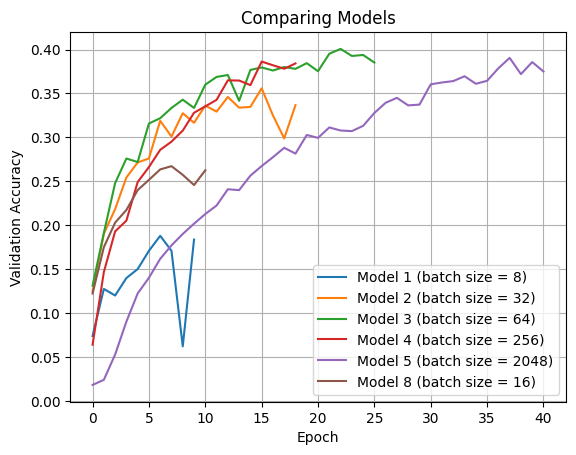

In [18]:
# make a plot of validation accuracy over time
plt.plot(model_1_hist["val_accuracy"])
plt.plot(model_2_hist["val_accuracy"])
plt.plot(model_3_hist["val_accuracy"])
plt.plot(model_4_hist["val_accuracy"])
plt.plot(model_5_hist["val_accuracy"])
plt.plot(model_8_hist["val_accuracy"])

plt.title("Comparing Models")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.grid()

plt.legend(["Model 1 (batch size = "+str(batch_size_1)+")",
            "Model 2 (batch size = "+str(batch_size_2)+")",
            "Model 3 (batch size = "+str(batch_size_3)+")",
            "Model 4 (batch size = "+str(batch_size_4)+")",
            "Model 5 (batch size = "+str(batch_size_5)+")",
            "Model 8 (batch size = "+str(batch_size_8)+")"]);

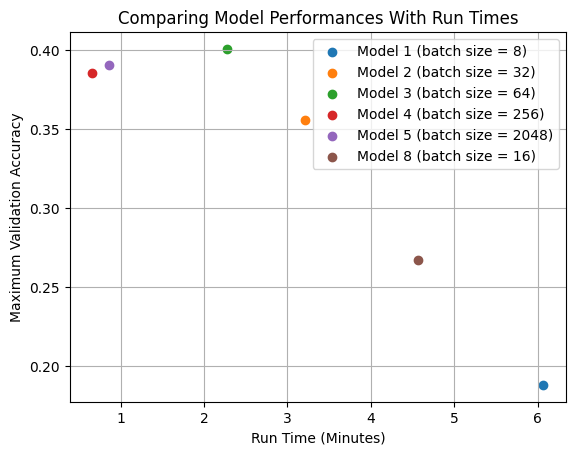

In [19]:
# make a plot of max validation accuracy vs model run duration
plt.scatter(durations[0], max_val_acc[0])
plt.scatter(durations[1], max_val_acc[1])
plt.scatter(durations[2], max_val_acc[2])
plt.scatter(durations[3], max_val_acc[3])
plt.scatter(durations[4], max_val_acc[4])
plt.scatter(durations[5], max_val_acc[5])

plt.title("Comparing Model Performances With Run Times")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Maximum Validation Accuracy")
plt.grid()

plt.legend(["Model 1 (batch size = "+str(batch_size_1)+")",
            "Model 2 (batch size = "+str(batch_size_2)+")",
            "Model 3 (batch size = "+str(batch_size_3)+")",
            "Model 4 (batch size = "+str(batch_size_4)+")",
            "Model 5 (batch size = "+str(batch_size_5)+")",
            "Model 8 (batch size = "+str(batch_size_8)+")"]);

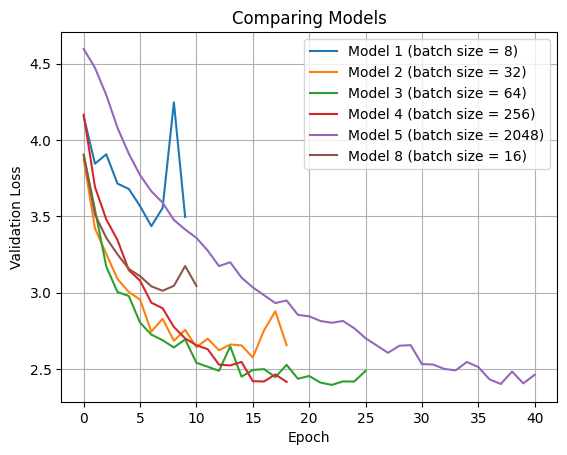

In [20]:
# make a plot of validation loss over time
plt.plot(model_1_hist["val_loss"])
plt.plot(model_2_hist["val_loss"])
plt.plot(model_3_hist["val_loss"])
plt.plot(model_4_hist["val_loss"])
plt.plot(model_5_hist["val_loss"])
plt.plot(model_8_hist["val_loss"])

plt.title("Comparing Models")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.grid()

plt.legend(["Model 1 (batch size = "+str(batch_size_1)+")",
            "Model 2 (batch size = "+str(batch_size_2)+")",
            "Model 3 (batch size = "+str(batch_size_3)+")",
            "Model 4 (batch size = "+str(batch_size_4)+")",
            "Model 5 (batch size = "+str(batch_size_5)+")",
            "Model 8 (batch size = "+str(batch_size_8)+")"]);

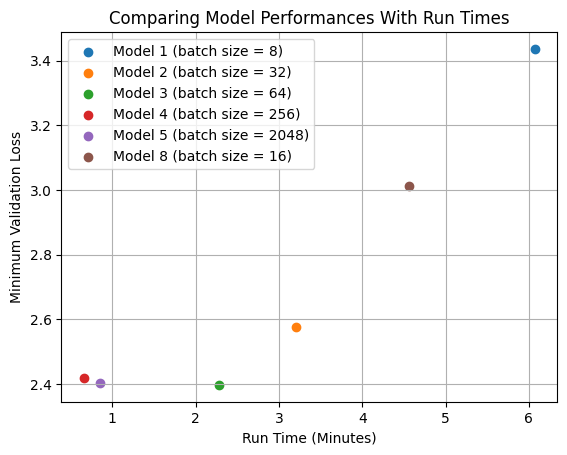

In [21]:
# make a plot of min validation loss vs model run duration
plt.scatter(durations[0], min_val_loss[0])
plt.scatter(durations[1], min_val_loss[1])
plt.scatter(durations[2], min_val_loss[2])
plt.scatter(durations[3], min_val_loss[3])
plt.scatter(durations[4], min_val_loss[4])
plt.scatter(durations[5], min_val_loss[5])

plt.title("Comparing Model Performances With Run Times")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Minimum Validation Loss")
plt.grid()

plt.legend(["Model 1 (batch size = "+str(batch_size_1)+")",
            "Model 2 (batch size = "+str(batch_size_2)+")",
            "Model 3 (batch size = "+str(batch_size_3)+")",
            "Model 4 (batch size = "+str(batch_size_4)+")",
            "Model 5 (batch size = "+str(batch_size_5)+")",
            "Model 8 (batch size = "+str(batch_size_8)+")"]);